In [1]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *
import zipfile
import numpy as np


In [2]:
# Step 1: Unzip and Read Data

# Extract files from ZIP
zip_path = "CMU-MS-DAS-Vis-S25/data/ggplot2-minard-gallery.zip"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/Users/ananyaagrawal/Desktop/CMU Courses/CMU Sem 2/Info Visualization/')

In [3]:
# load the text files into Pandas DataFrames:

# Load data
cities = pd.read_csv('cities.txt', sep=' ', skipinitialspace=True)
troops = pd.read_csv('troops.txt', sep=' ', skipinitialspace=True)
temps = pd.read_csv('temps.txt', sep=' ', skipinitialspace=True)


In [4]:
# Ensure correct column names
cities.columns = ['long', 'lat', 'city']
troops.columns = ['long', 'lat', 'survivors', 'direction', 'group']
temps.columns = ['long', 'temp', 'days', 'month', 'date']

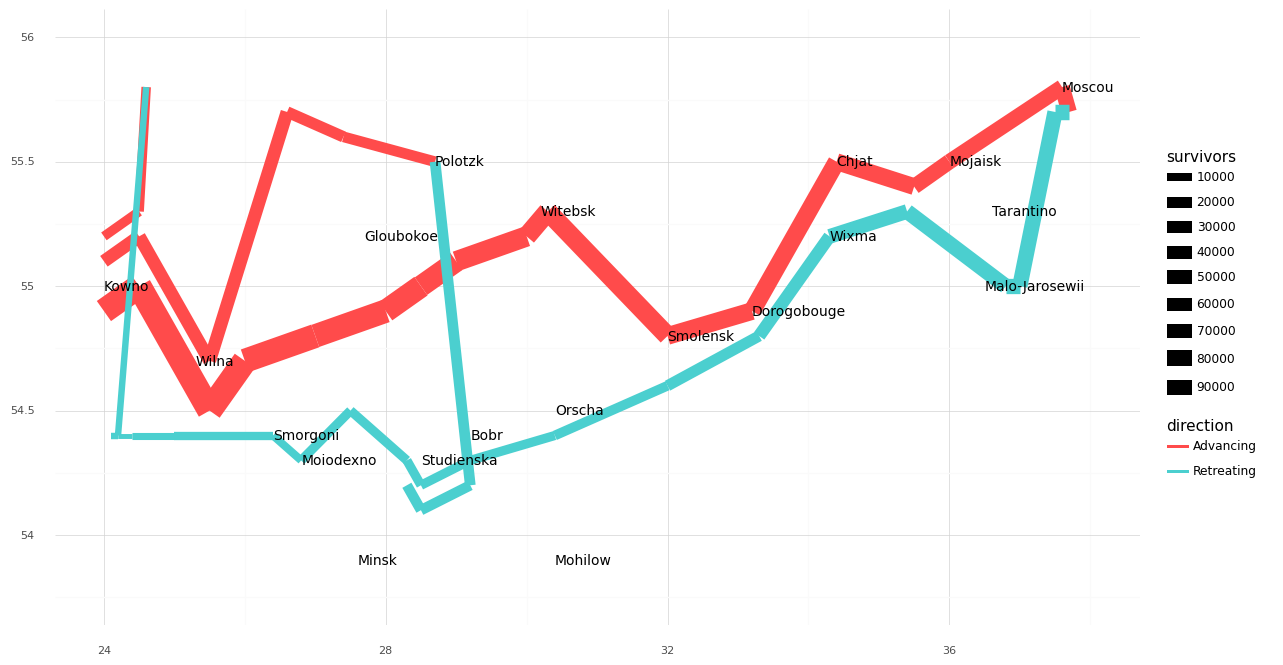

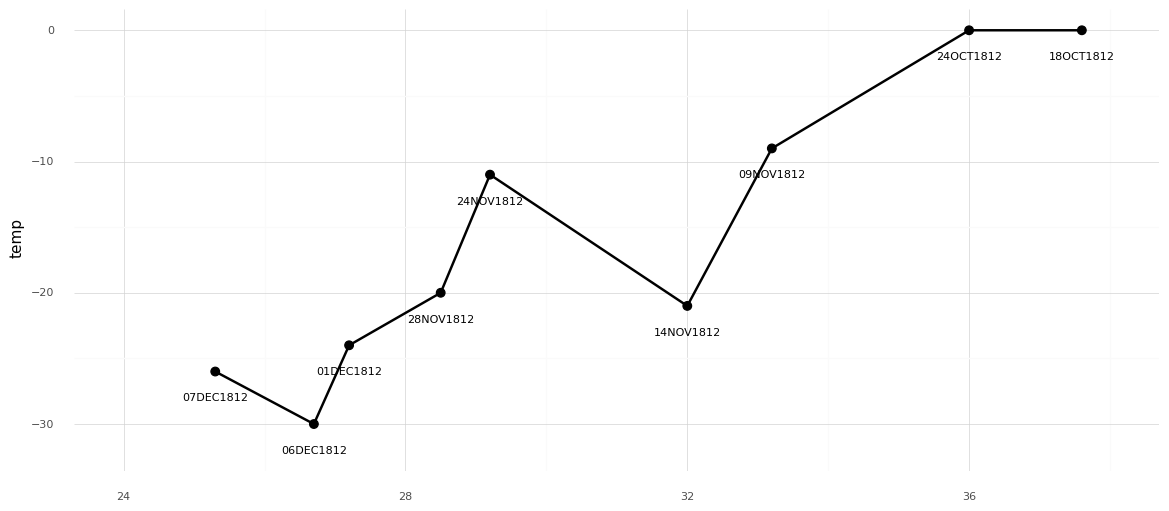

In [41]:
# Create a categorical direction column
direction_map = {
    'A': 'Advancing',
    'R': 'Retreating'
}
troops['direction_cat'] = troops['direction'].map(direction_map)

# First plot: Troop movement
troop_plot = (
    ggplot(troops, aes(x='long', y='lat'))
    + geom_path(aes(size='survivors', color='direction_cat', group='group'))
    + geom_text(data=cities, mapping=aes(x='long', y='lat', label='city'), 
                size=10, color='black', ha='left')
    + scale_size_continuous(range=[2, 10], name="survivors", breaks=[10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000])
    + scale_color_manual(values={'Advancing': '#FF4B4B', 'Retreating': '#4BCFCF'}, name="direction")
    + scale_x_continuous(breaks=range(24, 39, 4))
    + coord_cartesian(xlim=(24, 38), ylim=(53.75, 56))
    + labs(x=None, y=None)
    + theme_minimal()
    + theme(
        panel_grid_major=element_line(color='lightgray', size=0.5),
        panel_background=element_rect(fill='white'),
        legend_position='right',
        axis_text=element_text(size=8),
        figure_size=(14, 8)
    )
)

# Second plot: Temperature variations
temp_plot = (
    ggplot(temps, aes(x='long', y='temp'))
    + geom_line(color='black', size=1)
    + geom_point(color='black', size=3)
    + geom_text(aes(label='date'), size=8, nudge_y=-2)
    + coord_cartesian(xlim=(24, 38))
    + labs(x=None, y='temp')
    + theme_minimal()
    + theme(
        panel_grid_major=element_line(color='lightgray', size=0.5),
        panel_background=element_rect(fill='white'),
        axis_text=element_text(size=8),
        figure_size=(14, 6)
    )
)

# Display the plots
print(troop_plot)
print(temp_plot)

